<a href="https://colab.research.google.com/github/PunitRaveendran/ACM/blob/main/Day%203-Classifier%20Arena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

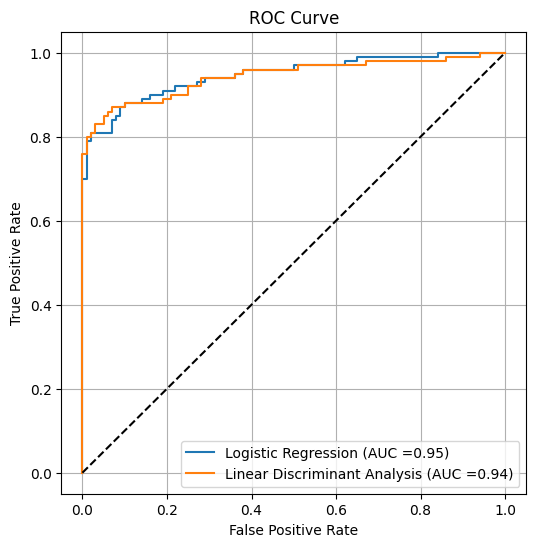


 ***Logistic Regression Metrics:*** 
Accuracy: 0.88
Confusion Matrix:
[[93  7]
 [17 83]]
ROC AUC Score: 0.95

 ***Linear Discriminant Analysis Metrics:*** 
Accuracy: 0.90
Confusion Matrix:
[[97  3]
 [18 82]]
ROC AUC Score: 0.94
*** Summary ***
The best model is Logistic Regression because As it has acheived higher ROC-AUC and Accuracy, showing better discrimination and overall performance


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("/content/mental_health_workplace_survey.csv")

X,y = make_classification(n_samples=1000, n_features=20, n_informative=6, n_redundant=5, random_state=46)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=46,stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic_regression = LogisticRegression(random_state = 46)
Logistic_regression.fit(X_train_scaled,y_train)

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train_scaled,y_train)

#predictions
y_pred_logistic = Logistic_regression.predict(X_test_scaled)
y_pred_LDA = LDA.predict(X_test_scaled)

y_pred_prob_logistic = Logistic_regression.predict_proba(X_test_scaled)[:,1]
y_pred_prob_LDA = LDA.predict_proba(X_test_scaled)[:,1]

#Metrics asked
acc_Logistic = accuracy_score(y_test,y_pred_logistic)
acc_LDA = accuracy_score(y_test,y_pred_LDA)

conf_matrix_logistic = confusion_matrix(y_test,y_pred_logistic)
conf_matrix_LDA = confusion_matrix(y_test,y_pred_LDA)

roc_logistic = roc_auc_score(y_test,y_pred_prob_logistic)
roc_LDA = roc_auc_score(y_test,y_pred_prob_LDA)

#ROC curves
plt.figure(figsize=(6,6))
fpr_logistic,tpr_logistic,_ = roc_curve(y_test,y_pred_prob_logistic)
fpr_LDA,tpr_LDA,_ = roc_curve(y_test,y_pred_prob_LDA)

plt.plot(fpr_logistic,tpr_logistic,label=f'Logistic Regression (AUC ={roc_logistic:.2f})')
plt.plot(fpr_LDA,tpr_LDA,label=f'Linear Discriminant Analysis (AUC ={roc_LDA:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

#Printing
print("\n ***Logistic Regression Metrics:*** ")
print(f"Accuracy: {acc_Logistic:.2f}")
print("Confusion Matrix:")
print(conf_matrix_logistic)
print(f"ROC AUC Score: {roc_logistic:.2f}")

print("\n ***Linear Discriminant Analysis Metrics:*** ")
print(f"Accuracy: {acc_LDA:.2f}")
print("Confusion Matrix:")
print(conf_matrix_LDA)
print(f"ROC AUC Score: {roc_LDA:.2f}")

#Summary
better_model = "Logistic Regression" if roc_logistic > roc_LDA else "Linear Disriminant Analysis"
reason = (
    "As it has acheived higher ROC-AUC and Accuracy, showing better discrimination and overall performance"
    if better_model == "Logistic Regression "
    else "As it has acheived higher ROC-AUC and Accuracy, showing better discrimination and overall performance"
)
print("*** Summary ***")
print(f"The best model is {better_model} because {reason}")